In [13]:
# 导入NumPy库，一个强大的科学计算包，提供了大量的数学函数处理能力
import numpy as np

# 导入Matplotlib库中的pyplot模块，这是一个绘图库，用于创建静态、动态、交互式的可视化图形
import matplotlib.pyplot as plt

# 从Scikit-learn库的数据集模块中导入make_classification函数，该函数用于生成用于分类任务的示例数据集
from sklearn.datasets import make_classification

# 从Scikit-learn库的降维模块中导入PCA（主成分分析）类，PCA是一种常用的数据降维技术
from sklearn.decomposition import PCA

# 打印matplotlib中可用的所有样式，样式可以帮助快速设置图表的整体外观，包括线条样式、颜色方案等
print("Available styles:", plt.style.available)

# 设置matplotlib使用的样式为'seborn-v0_8'。Seaborn是一个基于matplotlib的高级界面，提供了更美观的默认风格
plt.style.use('seaborn-v0_8')

# 使用make_classification生成一个用于分类任务的数据集
# n_samples：样本数量
# n_features：特征数量
# n_redundant：冗余特征数量，这里设为0表示没有冗余特征
# n_informative：信息量特征的数量
# random_state：随机数生成器的种子，相同的种子会生成相同的随机数序列，便于复现实验结果
# n_clusters_per_class：每个类别下的簇的数量
X, y = make_classification(n_samples=200,  # 样本总数
                           n_features=3,   # 特征数
                           n_redundant=0,  # 冗余特征数
                           n_informative=2,# 信息特征数
                           random_state=42,# 随机种子
                           n_clusters_per_class=1) # 每个类别的簇数

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [14]:
# 创建一个PCA实例，指定降维后的主成分数目为2
# n_components: 主成分的数量，这里设置为2，意味着我们将数据降到二维空间
pca = PCA(n_components=2)

# 使用PCA实例对数据X进行拟合，并转换数据到新的低维空间
# fit_transform方法同时计算PCA模型参数并应用这些参数到输入数据X上，返回降维后的数据
X_pca = pca.fit_transform(X)

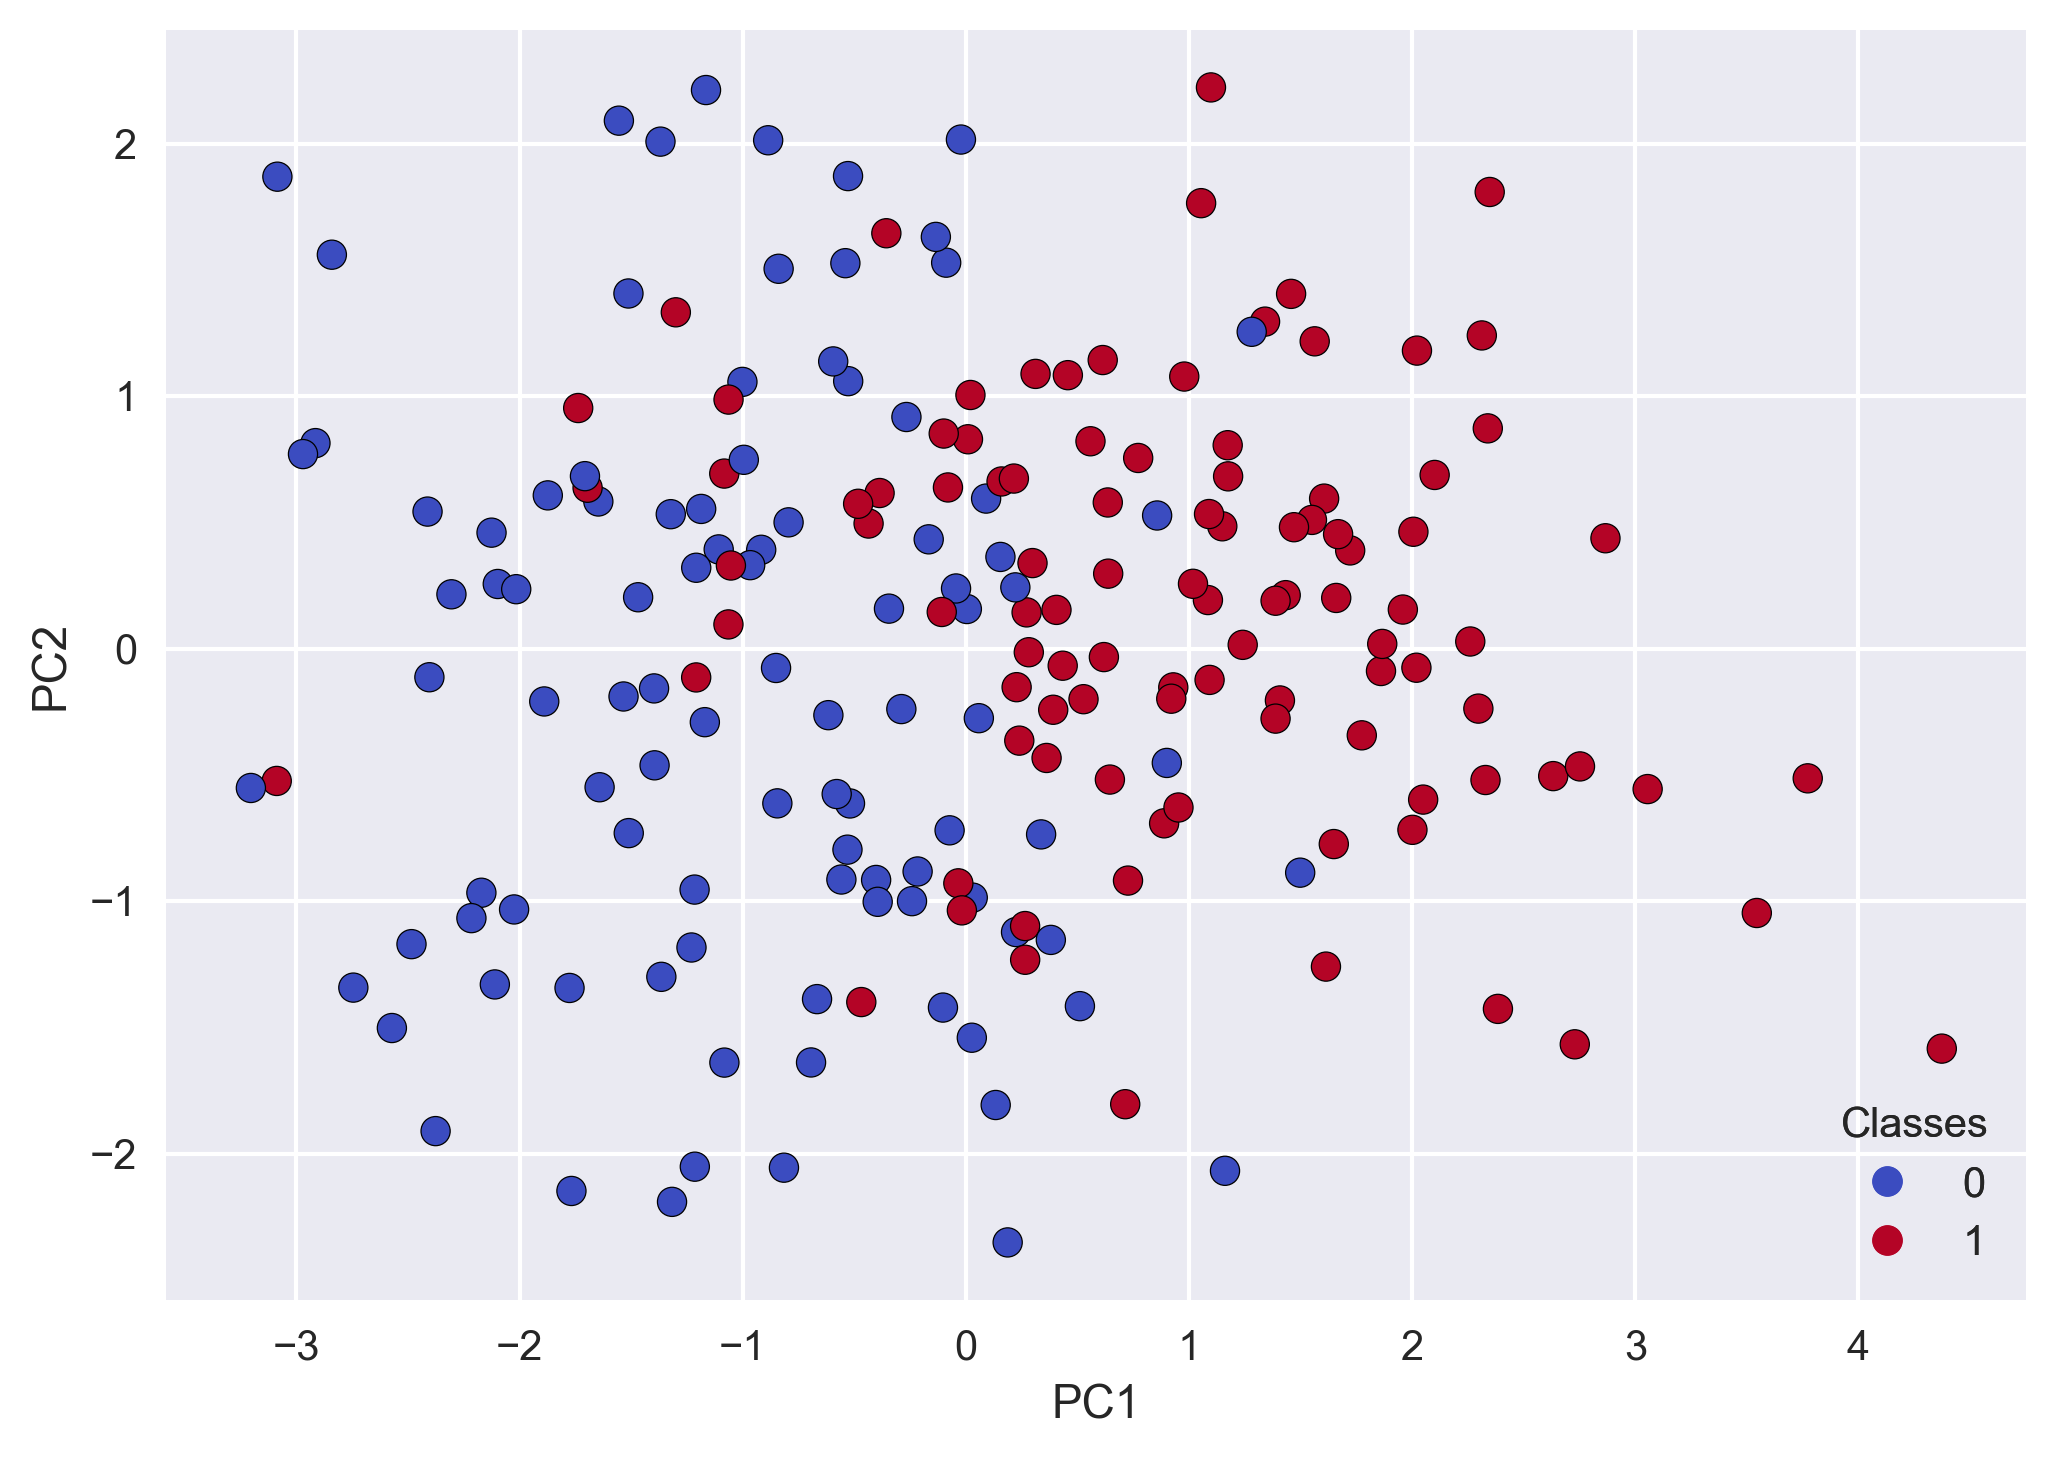

In [15]:
# 创建一个新的图形和轴对象，设置分辨率为300dpi以获得更清晰的图像
fig, ax = plt.subplots(dpi=300)

# 在图上创建一个散点图，其中x轴是第一个主成分(PC1)，y轴是第二个主成分(PC2)
# 'c=y' 表示根据'y'的值给散点着色，假设'y'是一个类别标签数组
# 'cmap' 指定了颜色映射，这里使用的是'coolwarm'
# 'edgecolor' 设置了散点边缘的颜色
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')

# 创建一个图例，显示不同类别的颜色编码
# scatter.legend_elements() 自动确定图例元素
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")

# 将图例添加到图形上
ax.add_artist(legend1)

# 设置x轴标签为'PC1'(第一主成分)
plt.xlabel('PC1')

# 设置y轴标签为'PC2'(第二主成分)
plt.ylabel('PC2')

# 显示图表
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

In [17]:
import numpy as np  # 导入NumPy库，用于科学计算

# 设置随机数生成器的种子，以确保结果可复现
np.random.seed(0)

# 定义数据集中样本的数量
n_samples = 2000

# 生成一个线性空间，从0到8（包括8），共n_samples个点
# 这个一维数组代表了时间序列中的各个时间点
time = np.linspace(0, 8, n_samples)

# 生成第一个信号，这是一个频率为2的正弦波
# 2 * time 表示正弦波的频率为2，即在单位时间内完成2个周期
s1 = np.sin(2 * time)

# 生成第二个信号，这是一个频率为3的方波
# 使用 np.sign 函数将 sin(3 * time) 转换为方波，大于0的部分为+1，小于0的部分为-1
s2 = np.sign(np.sin(3 * time))

# 将两个信号合并成一个二维数组，每一列表示一个信号
S = np.c_[s1, s2]

# 向原始信号 S 中添加高斯白噪声，噪声的均值为0，标准差为0.2
# np.random.normal(size=S.shape) 生成与 S 相同形状的正态分布随机数
# 乘以 0.2 是为了调整噪声的强度
S += 0.2 * np.random.normal(size=S.shape)

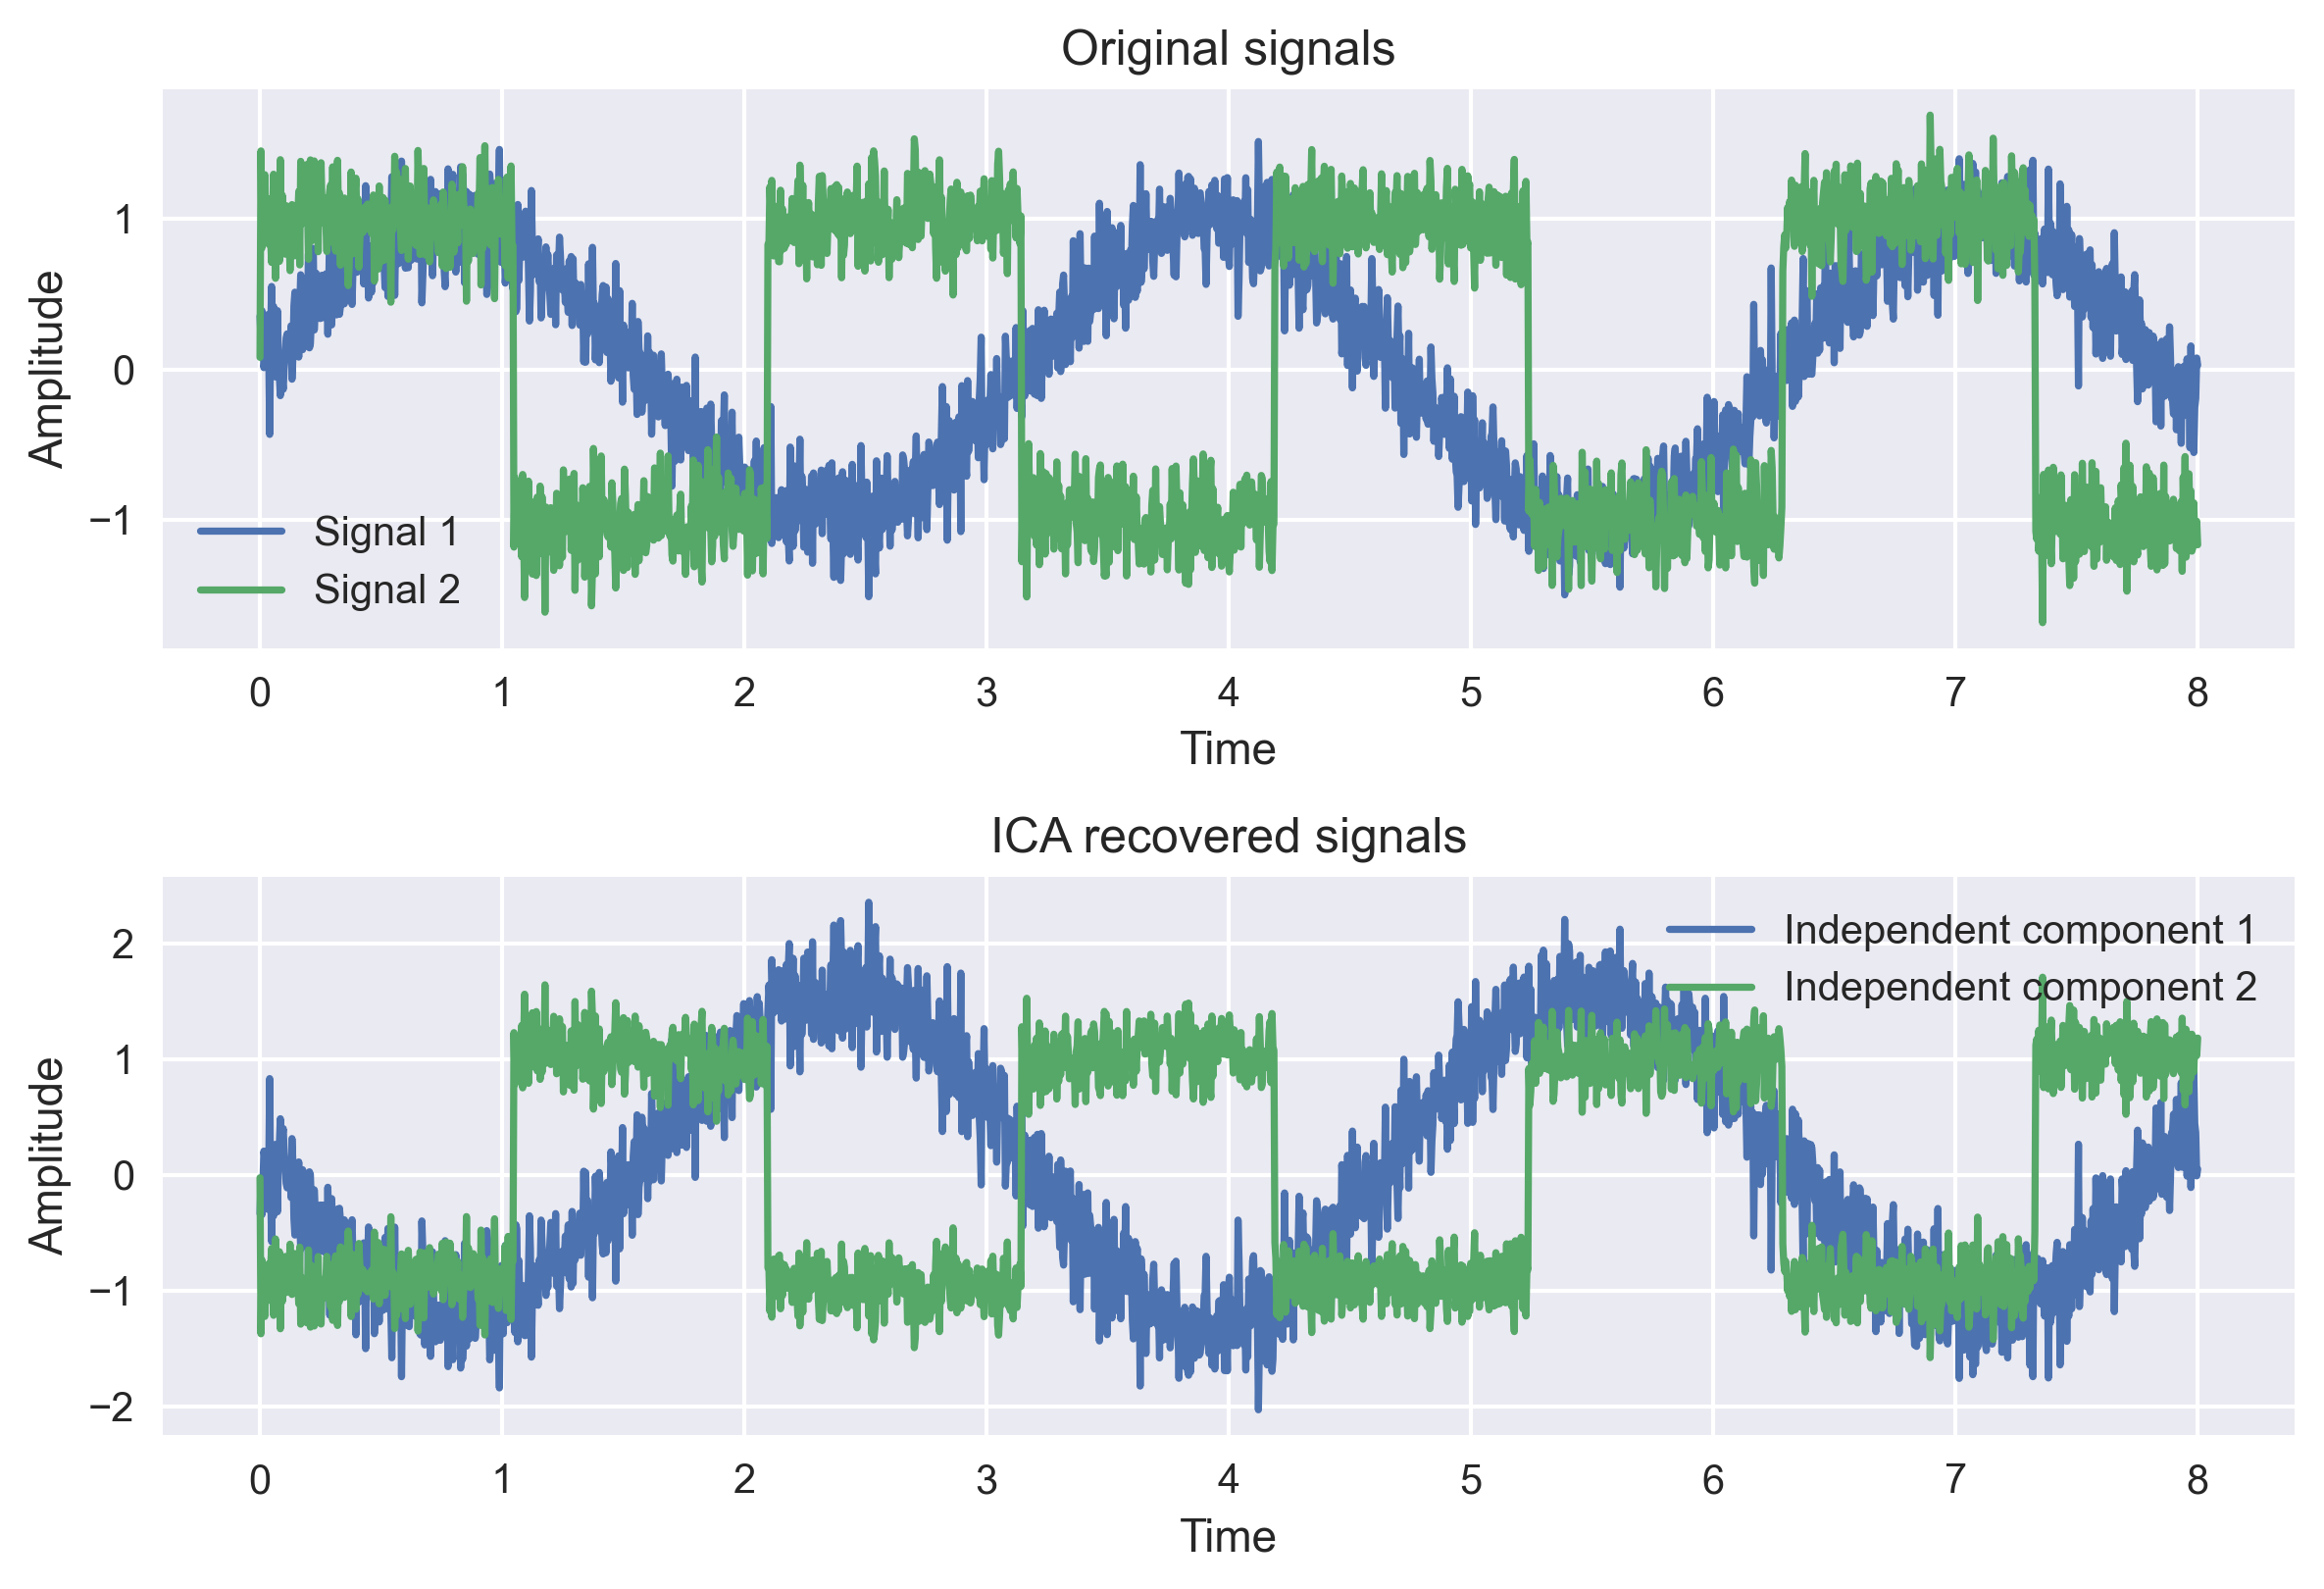

In [20]:
# 导入绘图库 matplotlib.pyplot，并简写为 plt
import matplotlib.pyplot as plt

# 开始一个新的图形窗口，设置分辨率为300dpi，提高图形清晰度
plt.figure(dpi=300)

# 创建一个2x1的子图网格中的第一个子图
plt.subplot(2, 1, 1)

# 绘制原始数据集的第一个信号随时间的变化曲线
plt.plot(time, S[:, 0], label='Signal 1')

# 绘制原始数据集的第二个信号随时间的变化曲线
plt.plot(time, S[:, 1], label='Signal 2')

# 设置X轴标签为时间
plt.xlabel('Time')

# 设置Y轴标签为振幅
plt.ylabel('Amplitude')

# 设置图表标题为“原始信号”
plt.title('Original signals')

# 添加图例显示信号标识
plt.legend()

# 对数据执行ICA降维处理，这里指定提取两个独立成分
ica = FastICA(n_components=2)
S_ica = ica.fit_transform(S)

# 创建一个2x1的子图网格中的第二个子图
plt.subplot(2, 1, 2)

# 绘制ICA处理后得到的第一个独立成分随时间的变化曲线
plt.plot(time, S_ica[:, 0], label='Independent component 1')

# 绘制ICA处理后得到的第二个独立成分随时间的变化曲线
plt.plot(time, S_ica[:, 1], label='Independent component 2')

# 设置图表标题为“ICA恢复的信号”
plt.title('ICA recovered signals')

# 设置X轴标签为时间
plt.xlabel('Time')

# 设置Y轴标签为振幅
plt.ylabel('Amplitude')

# 添加图例显示独立成分标识
plt.legend()

# 自动调整子图间距，使布局更紧凑
plt.tight_layout()

# 显示绘图窗口
plt.show()

In [21]:
# 导入绘图库 matplotlib.pyplot，并简写为 plt
import matplotlib.pyplot as plt

# 从 scikit-learn 的数据集模块导入 load_digits 函数，用于加载手写数字数据集
from sklearn.datasets import load_digits

# 从 scikit-learn 的流形学习模块导入 t-SNE 类
from sklearn.manifold import TSNE

# 加载手写数字数据集
# load_digits() 函数会加载一个包含8x8大小的手写数字图片的数据集
digits = load_digits()

# 初始化 t-SNE 模型，并设置参数
# n_components=2 表示要将数据降至二维空间
# perplexity=30.0 表示每个点附近的邻居数量，用于平衡局部和全局结构
# random_state=42 用于确保结果的可复现性
tsne = TSNE(n_components=2, perplexity=30.0, random_state=42)

# 对手写数字数据集进行 t-SNE 降维处理
# fit_transform 方法同时计算 t-SNE 模型并转换数据
X_tsne = tsne.fit_transform(digits.data)

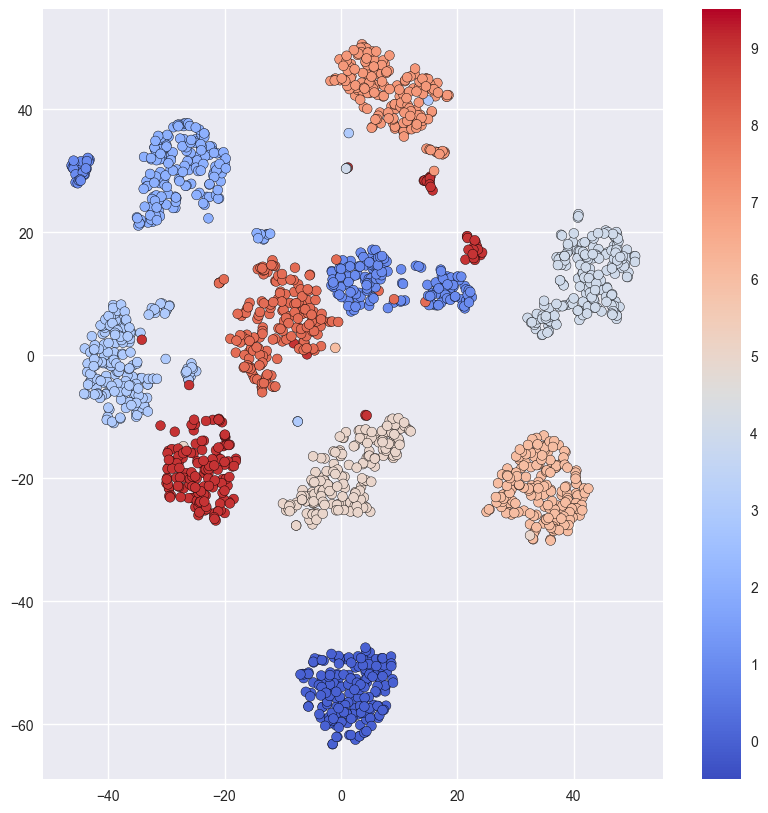

In [22]:
# 创建一个新的图形窗口，设置大小为10x10英寸
plt.figure(figsize=(10, 10))

# 使用scatter方法绘制散点图
# X_tsne[:, 0] 和 X_tsne[:, 1] 分别代表降维后的两个维度
# c=digits.target 设置每个点的颜色，根据 digits 数据集的目标变量（即手写数字的真实标签）
# edgecolor='k' 设置点的边缘颜色为黑色
# cmap=plt.cm.coolwarm 使用名为 coolwarm 的颜色映射方案
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, edgecolor='k', cmap=plt.cm.coolwarm)

# 添加颜色条，并设置显示的刻度为0到9之间的整数
plt.colorbar(ticks=range(10))

# 设置颜色条的范围为-0.5到9.5，这样可以更好地映射颜色到实际的类别上
plt.clim(-0.5, 9.5)

# 显示图形
plt.show()

In [23]:
#该数据的样本维度是64维
digits.data.shape

(1797, 64)